In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#- Import data into Python environment.
comcast=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [5]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
comcast.shape

(2224, 11)

In [7]:
comcast.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [8]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
comcast['month']=pd.to_datetime(comcast['Date_month_year']).dt.month_name()

In [9]:
comcast['date']=pd.to_datetime(comcast['Date_month_year']).dt.day

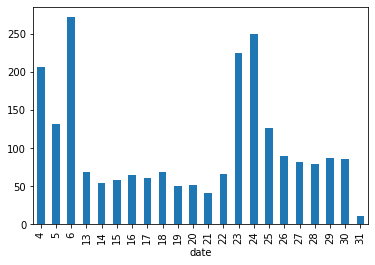

In [10]:
comcast.groupby(['date'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

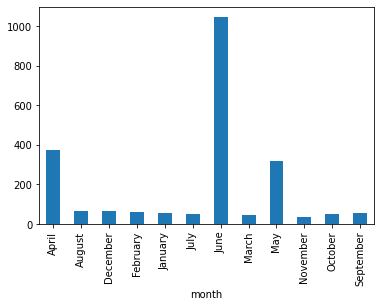

In [11]:
comcast.groupby(['month'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

In [16]:
#Provide a table with the frequency of complaint types
comcast['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,comcast billing increase,1
1837,Improper Billing/Services,1
1838,Comcast refuses service to my address,1
1839,Throttling by Comcast/Xfinity,1


In [18]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
comcast['Customer Complaint'].value_counts().head(5).to_frame()


,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Data Caps,11


In [21]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as 
#Open and Closed & Solved is to be categorized as Closed.
comcast['Status']=comcast['Status'].apply(lambda x: 'Open' if ((x=='Open')|(x=='Pending')) else 'Closed')

In [22]:
comcast['Status']

0       Closed
1       Closed
2       Closed
3         Open
4       Closed
         ...  
2219    Closed
2220    Closed
2221    Closed
2222    Closed
2223      Open
Name: Status, Length: 2224, dtype: object

In [23]:
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 
op_en=comcast[comcast['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()

In [24]:
clo_se=comcast[comcast['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

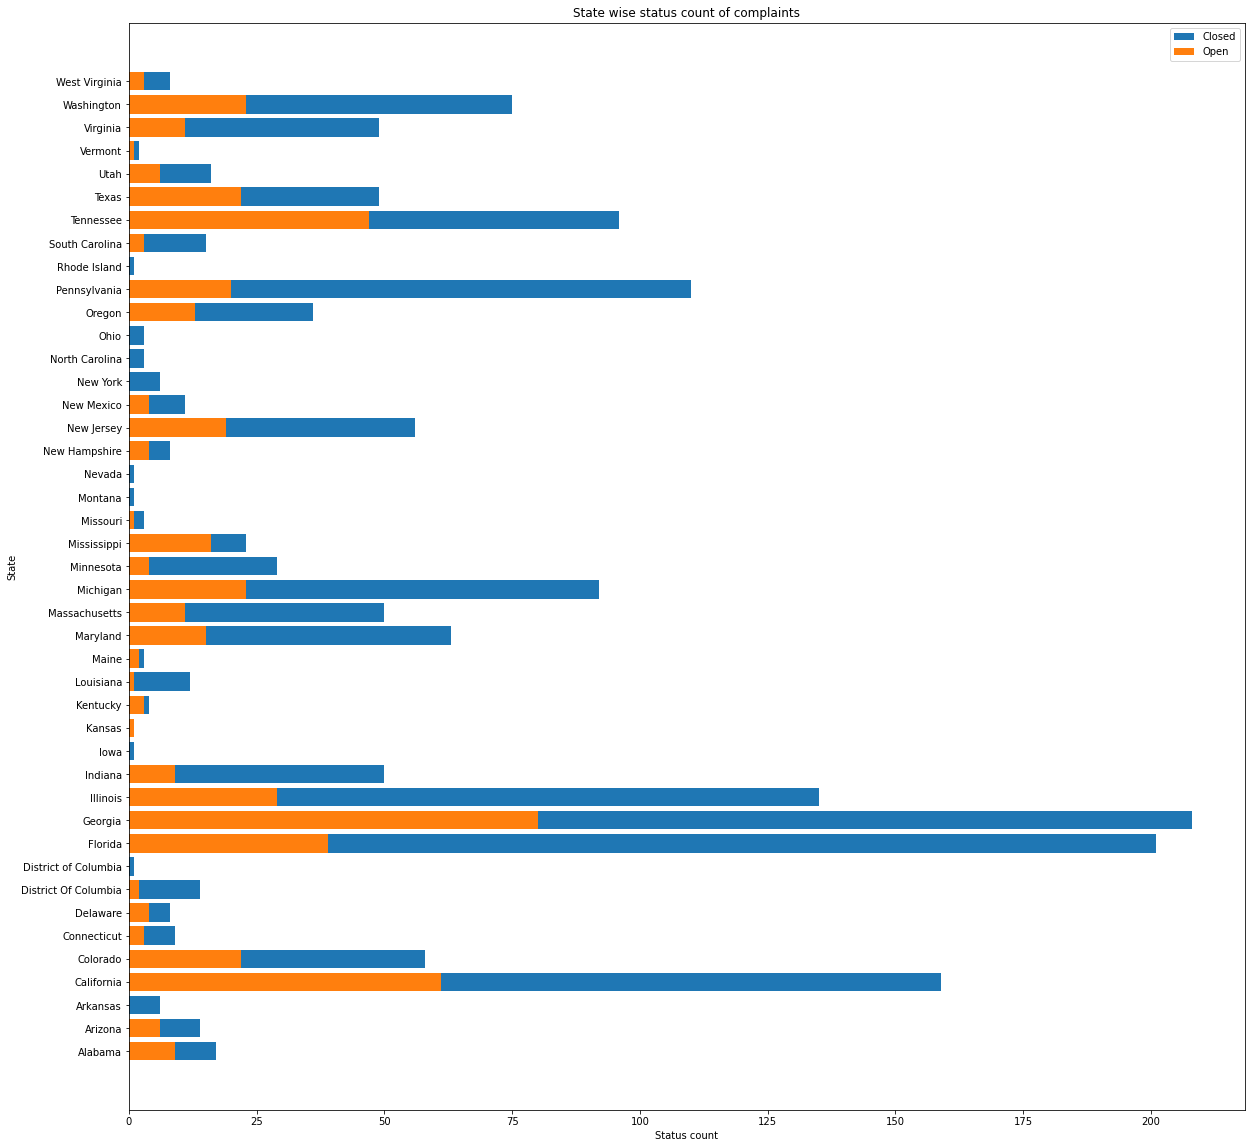

In [25]:
fig=plt.figure(figsize=(20,20))
plt.barh(clo_se.State,clo_se.Status)
plt.barh(op_en.State,op_en.Status)
plt.ylabel('State')
plt.xlabel('Status count')
plt.legend(['Closed','Open'])
plt.title('State wise status count of complaints')
plt.show()

In [26]:
# Which state has the maximum complaints
comcast.groupby('State')['Customer Complaint'].agg('count').sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: Customer Complaint, dtype: int64

In [28]:
#Which state has the highest percentage of unresolved complaints
unresolved_case=comcast.loc[comcast['Status']=='Open',['State']].value_counts().head()

In [29]:
unresolved_case

State     
Georgia       80
California    61
Tennessee     47
Florida       39
Illinois      29
dtype: int64

In [30]:
(unresolved_case/unresolved_case.sum())*100

State     
Georgia       31.250000
California    23.828125
Tennessee     18.359375
Florida       15.234375
Illinois      11.328125
dtype: float64

In [ ]:
#Provide the percentage of complaints resolved till date, which were received through the Internet 
#and customer care calls.

In [33]:
resolved_case=comcast.loc[comcast['Status']=='Closed'].groupby('Status')['Received Via']
.value_counts().head()

In [34]:
resolved_case

Status  Received Via      
Closed  Customer Care Call    864
        Internet              843
Name: Received Via, dtype: int64

In [35]:
(resolved_case/resolved_case.sum())*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64